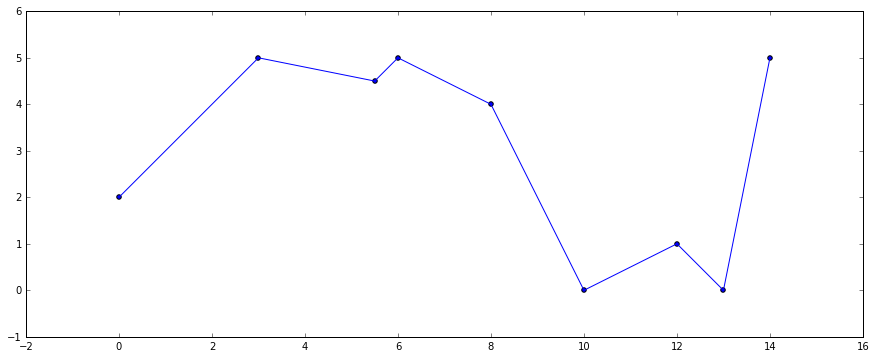

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
poly = np.array([[0,2],
                 [3,5],
                 [5.5,4.5],
                 [6,5],
                 [8,4],
                 [10,0],
                 [12,1],
                 [13,0],
                 [14,5]
                ],dtype='double');
#poly = poly0
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

In [8]:
import math
#from http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html
def point_line_distance(x0,y0,x1,y1,x2,y2):
    return abs((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)) / math.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))

print point_line_distance(1,3,1,2,2,3)
print point_line_distance(0,0,-2,0,0,-2)


0.707106781187
1.41421356237


In [17]:
def simplify_reumann_witkam(tolerance,p,step=-1):
    mask = np.ones(len(p),dtype='bool')
    first = 0
    second = 1
    third = 2
    
    marker = np.array([p[first],p[second],p[third]],dtype='double')
    
    if step == -1:
        maxstep = len(p)
    else:
        maxstep = min(step,len(p))

    for i in range(0,min(maxstep,len(p)-2)):
        
        dist = point_line_distance(p[third,0],p[third,1],p[first,0],p[first,1],p[second,0],p[second,1])
        #print dist
        if dist <= tolerance:
            mask[third] = False
            third = third+1 
        else:
            first = second
            second = third
            third = third+1
        marker = np.array([p[first],p[second]],dtype='double')
            
    return mask,marker

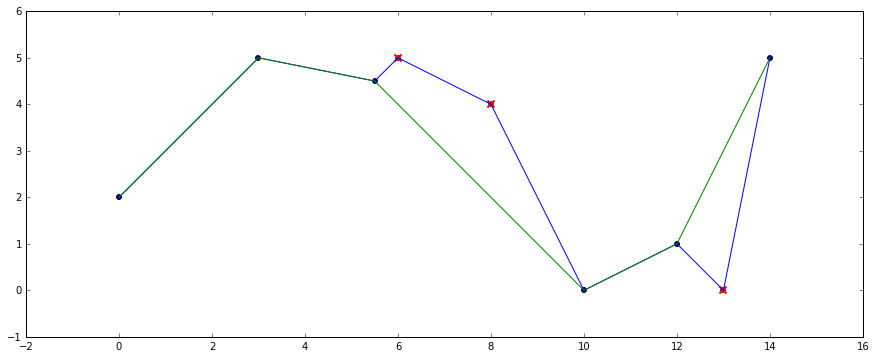

In [18]:
mask,_ = simplify_reumann_witkam(2.0,poly)

#figure
fig = plt.figure(figsize=(15,6))
fig.gca().set_aspect('equal', adjustable='box')

#the original polygon
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

#simplified polygon
simplified = poly[mask]
plt.plot(simplified[:,0],simplified[:,1])
plt.scatter(simplified[:,0],simplified[:,1])

#deleted points
deleted = poly[np.logical_not(mask)]
plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)

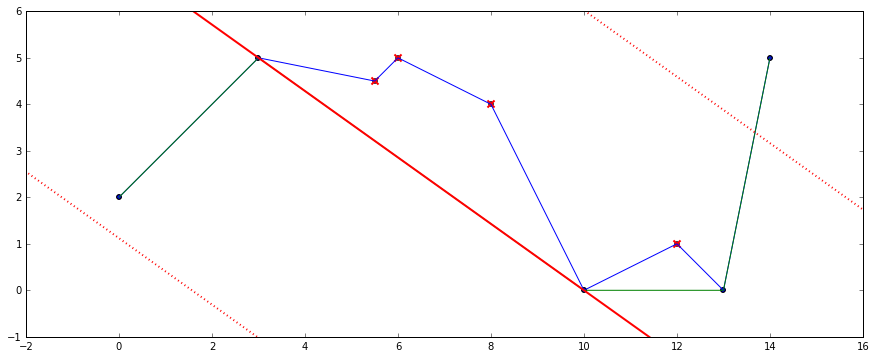

In [20]:
def plotpoly(tolerance,step):
    mask,marker = simplify_reumann_witkam(tolerance,poly,step)
    simplified = poly[mask]

    #figure
    fig = plt.figure(figsize=(15,6))
    fig.gca().set_aspect('equal', adjustable='box')

    #the original polygon
    plt.plot(poly[:,0],poly[:,1])
    plt.scatter(poly[:,0],poly[:,1])

    #simplified polygon
    simplified = poly[mask]
    plt.plot(simplified[:,0],simplified[:,1])
    plt.scatter(simplified[:,0],simplified[:,1])

    #deleted points
    deleted = poly[np.logical_not(mask)]
    plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)
    
    #marker depending on steps
    if len(marker):
        m = plt.Line2D(marker[:,0],marker[:,1],color='red')
        vec = marker[1]-marker[0]
        len1vec = vec / math.sqrt(np.dot(vec,vec))

        p1 = marker[0]-1*vec
        p2 = marker[0]+2*vec
        line = np.array([p1,p2])
        m = plt.Line2D(line[:,0],line[:,1],color='red',linewidth=2.0)
        fig.gca().add_artist(m)

        normvec = np.array([-len1vec[1],len1vec[0]])  
        left = marker[0]+ tolerance*normvec
        p1 = left-1*vec
        p2 = left+2*vec
        line = np.array([p1,p2])
        l = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(l)

        right = marker[0]- tolerance*normvec
        p1 = right-1*vec
        p2 = right+2*vec
        line = np.array([p1,p2])
        r = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(r)

from IPython.html.widgets import *
interact(plotpoly, tolerance=(0,10,0.1),step=(0,10,1));